In [2]:
import time
import numpy as np
import scipy as sp
import scipy.ndimage
import os
from IPython.display import display, clear_output, HTML
import sys
os.environ['PYOPENCL_COMPILER_OUTPUT'] = '0'

from mcClass import *
import matplotlib.pyplot as plt
from matplotlib import animation, rc
animation.rcParams['animation.writer']='ffmpeg'

%matplotlib inline



In [3]:
fM = 2.0
fS = 1.0
octa = 1
th = 20
thS = 20
fT = 1.0/0.3
v = 0
MC = np.zeros((30), dtype=object)

i=0
for th in np.array([0,60,120,180,240,300]):
    v = 1.0*np.array([np.cos(th),np.sin(th)])
    for thS in np.array([0.5,2.5,5,10,20]):
        MC[i] = motionCloud(overSamp=2, N=256, chooseDev=0)
        MC[i].mcKernel(fM, fS, th, thS, fT, v, octa)
        MC[i].initGPU()
        i+=1


C:\Anaconda2\lib\site-packages\pyopencl\__init__.py:63: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  "to see more.", CompilerWarning)


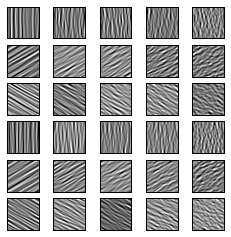

In [4]:
fig1, axes1 = plt.subplots(nrows=6, ncols=5,figsize=(4, 4))

i=0
for k in range(6):
    for l in range(5):
        axes1[k,l].imshow(MC[i].getFrame(), cmap='gray')
        axes1[k,l].xaxis.set_visible(False)
        axes1[k,l].yaxis.set_visible(False)

        i+=1

It: 99


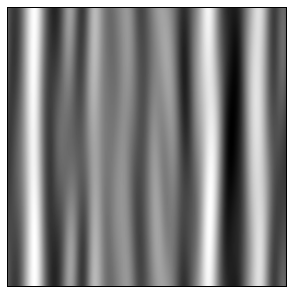

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig01, axes01 = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))

def init():
    for i in range(200):
        MC[0].getFrame()
    return ()


def animate(i): 
    
    im0 = axes01.imshow(MC[0].getFrame(), cmap='gray')
    axes01.xaxis.set_visible(False)
    axes01.yaxis.set_visible(False)
    
    clear_output(wait=True)
    print 'It: %i'%i
    sys.stdout.flush()
    return (im0,)
            
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig01, animate, init_func=init, frames=100, interval=50, blit=True)
HTML(anim.to_html5_video()) 
